In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import csv
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [17]:
filenames = ["flightdata_jan16.csv","flightdata_feb16.csv","flightdata_mar16.csv"]

In [18]:
combined_csv = pd.concat( [ pd.read_csv(f) for f in filenames ] )

In [19]:
combined_csv.to_csv( "combined_csv.csv", index=False )

In [29]:
#combined_csv.dtypes

In [21]:
combined_csv.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,FL_NUM,ORIGIN_AIRPORT_ID,...,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DIV_AIRPORT_LANDINGS,DIV_REACHED_DEST,DIV_ARR_DELAY,Unnamed: 45
0,2016,1,1,5,2016-01-01,DL,19790,DL,1248,11433,...,1979.0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
1,2016,1,1,5,2016-01-01,DL,19790,DL,1251,10397,...,640.0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
2,2016,1,1,5,2016-01-01,DL,19790,DL,1254,12892,...,1947.0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
3,2016,1,1,5,2016-01-01,DL,19790,DL,1255,14869,...,1590.0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
4,2016,1,1,5,2016-01-01,DL,19790,DL,1256,10849,...,874.0,72.0,0.0,52.0,0.0,0.0,0,NaN,NaN,NaN


In [24]:
combined_csv .drop(['Unnamed: 45', 'WHEELS_OFF','TAXI_OUT', 'WHEELS_ON', 'TAXI_IN','ORIGIN_AIRPORT_SEQ_ID','DEST_AIRPORT_SEQ_ID'], axis=1, inplace=True)

In [25]:
combined_csv.count()

YEAR                    1348838
MONTH                   1348838
DAY_OF_MONTH            1348838
DAY_OF_WEEK             1348838
FL_DATE                 1348838
UNIQUE_CARRIER          1348838
AIRLINE_ID              1348838
CARRIER                 1348838
FL_NUM                  1348838
ORIGIN_AIRPORT_ID       1348838
ORIGIN                  1348838
ORIGIN_CITY_NAME        1348838
ORIGIN_STATE_ABR        1348838
DEST_AIRPORT_ID         1348838
DEST                    1348838
DEST_CITY_NAME          1348838
DEST_STATE_ABR          1348838
CRS_DEP_TIME            1348838
DEP_TIME                1326275
DEP_DELAY_NEW           1326275
DEP_DEL15               1326275
CRS_ARR_TIME            1348838
ARR_TIME                1324903
ARR_DELAY_NEW           1322681
ARR_DEL15               1322681
CANCELLED               1348838
CANCELLATION_CODE         23221
DIVERTED                1348838
AIR_TIME                1322681
FLIGHTS                 1348838
DISTANCE                1348838
CARRIER_

In [34]:
#Filter out multi-stop flight trips
combined_csv = combined_csv.loc[combined_csv["FLIGHTS"]==1 ,:]

In [35]:
#Seperate out state from Origin and Destination City
combined_csv['ORIGIN_CITY_NAME']=combined_csv['ORIGIN_CITY_NAME'].apply(lambda x: x.split(',')[0])
combined_csv['DEST_CITY_NAME']=combined_csv['DEST_CITY_NAME'].apply(lambda x: x.split(',')[0])

In [36]:
combined_csv.to_csv( "janmar16.csv", index=False )

In [2]:
filenames2 = ["janmar16.csv","aprjun16.csv","julsep16.csv","octdec16.csv"]

In [3]:
final_csv = pd.concat( [ pd.read_csv(f) for f in filenames2 ] )

C:\Users\indir\Anaconda3\envs\PythonData1\lib\site-packages\IPython\core\interactiveshell.py:2802: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [4]:
final_csv.to_csv( "final_csv.csv", index=False )

In [30]:
final_csv = pd.read_csv("final_csv.csv")
final_csv.head()               

C:\Users\indir\Anaconda3\envs\PythonData1\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,AIRLINE_ID,AIR_TIME,ARR_DEL15,ARR_DELAY,ARR_DELAY_NEW,ARR_TIME,CANCELLATION_CODE,CANCELLED,CARRIER,CARRIER_DELAY,...,MONTH,NAS_DELAY,ORIGIN,ORIGIN_AIRPORT_ID,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,SECURITY_DELAY,UNIQUE_CARRIER,WEATHER_DELAY,YEAR
0,19790,249.0,0.0,NaN,0.0,2120.0,NaN,0.0,DL,NaN,...,1,NaN,DTW,11433,Detroit,MI,NaN,DL,NaN,2016
1,19790,92.0,0.0,NaN,0.0,2319.0,NaN,0.0,DL,NaN,...,1,NaN,ATL,10397,Atlanta,GA,NaN,DL,NaN,2016
2,19790,207.0,0.0,NaN,0.0,547.0,NaN,0.0,DL,NaN,...,1,NaN,LAX,12892,Los Angeles,CA,NaN,DL,NaN,2016
3,19790,173.0,0.0,NaN,0.0,2213.0,NaN,0.0,DL,NaN,...,1,NaN,SLC,14869,Salt Lake City,UT,NaN,DL,NaN,2016
4,19790,121.0,1.0,NaN,124.0,1420.0,NaN,0.0,DL,72.0,...,1,52.0,BZN,10849,Bozeman,MT,0.0,DL,0.0,2016


In [19]:
final_csv.columns

Index(['AIRLINE_ID', 'AIR_TIME', 'ARR_DEL15', 'ARR_DELAY', 'ARR_DELAY_NEW',
       'ARR_TIME', 'CANCELLATION_CODE', 'CANCELLED', 'CARRIER',
       'CARRIER_DELAY', 'CRS_ARR_TIME', 'CRS_DEP_TIME', 'DAY_OF_MONTH',
       'DAY_OF_WEEK', 'DEP_DEL15', 'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_TIME',
       'DEST', 'DEST_AIRPORT_ID', 'DEST_CITY_NAME', 'DEST_STATE_ABR',
       'DISTANCE', 'DIVERTED', 'DIV_ACTUAL_ELAPSED_TIME',
       'DIV_AIRPORT_LANDINGS', 'DIV_ARR_DELAY', 'DIV_REACHED_DEST', 'FLIGHTS',
       'FL_DATE', 'FL_NUM', 'LATE_AIRCRAFT_DELAY', 'MONTH', 'NAS_DELAY',
       'ORIGIN', 'ORIGIN_AIRPORT_ID', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR',
       'SECURITY_DELAY', 'UNIQUE_CARRIER', 'WEATHER_DELAY', 'YEAR'],
      dtype='object')

In [31]:
final_delayed = final_csv.loc[final_csv["DEP_DEL15"] == 1 ,:]
final_delayed.head()

,AIRLINE_ID,AIR_TIME,ARR_DEL15,ARR_DELAY,ARR_DELAY_NEW,ARR_TIME,CANCELLATION_CODE,CANCELLED,CARRIER,CARRIER_DELAY,...,MONTH,NAS_DELAY,ORIGIN,ORIGIN_AIRPORT_ID,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,SECURITY_DELAY,UNIQUE_CARRIER,WEATHER_DELAY,YEAR
4,19790,121.0,1.0,NaN,124.0,1420.0,NaN,0.0,DL,72.0,...,1,52.0,BZN,10849,Bozeman,MT,0.0,DL,0.0,2016
5,19790,38.0,1.0,NaN,83.0,1402.0,NaN,0.0,DL,43.0,...,1,0.0,ATL,10397,Atlanta,GA,0.0,DL,0.0,2016
6,19790,37.0,1.0,NaN,74.0,1644.0,NaN,0.0,DL,3.0,...,1,0.0,BNA,10693,Nashville,TN,0.0,DL,0.0,2016
42,19790,129.0,0.0,NaN,2.0,2239.0,NaN,0.0,DL,NaN,...,1,NaN,FLL,11697,Fort Lauderdale,FL,NaN,DL,NaN,2016
45,19790,192.0,1.0,NaN,28.0,1653.0,NaN,0.0,DL,28.0,...,1,0.0,MSP,13487,Minneapolis,MN,0.0,DL,0.0,2016


In [21]:
final_delayed_bymonth = final_csv.groupby("MONTH",as_index=False)
final_delayed_bymonth   = final_delayed_bymonth["FLIGHTS"].count()
final_delayed_bymonth

,MONTH,FLIGHTS
0,1,445827
1,2,423889
2,3,479122
3,4,461630
4,5,958716
5,7,502457
6,8,498347
7,9,454878
8,10,472626
9,11,450938


In [32]:
final_delayed_bydate = final_delayed.groupby("FL_DATE",as_index=False)
final_delayed_bydate   = final_delayed_bydate["FLIGHTS"].count()
final_delayed_bydate.head()

,FL_DATE,FLIGHTS
0,2016-01-01,1948
1,2016-01-02,2800
2,2016-01-03,3798
3,2016-01-04,3443
4,2016-01-05,3144


In [2]:
plt.plot_date(final_delayed_bydate["FL_DATE"],final_delayed_bydate["FLIGHTS"])
plt.ylabel("MONTH")
plt.xlabel("Number of Flights")
plt.title("Total Number of Flights in 2016")

plt.show()

NameError: name 'plt' is not defined

In [ ]:
plt.plot

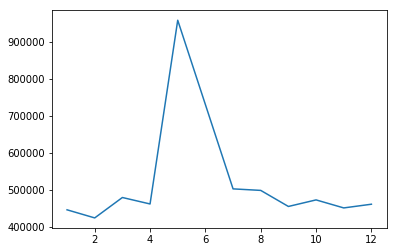

In [24]:
plt.plot(final_delayed_bymonth["MONTH"],final_delayed_bymonth["FLIGHTS"])
plt.show()

In [16]:
final_bydayofweek = final_csv.groupby("MONTH",as_index=False)
final_bydayofweek  = final_bydayofweek["FLIGHTS"].count()
final_bydayofweek 

,DAY_OF_WEEK,FLIGHTS
0,1,842046
1,2,827814
2,3,805303
3,4,813639
4,5,847648
5,6,682318
6,7,790611


In [33]:
final_csv_byairports = final_csv.groupby(["ORIGIN_AIRPORT_ID","DEST_AIRPORT_ID"],as_index=False)
final_majorairports = final_csv_byairports["FLIGHTS"].count()
final_majorairports.head()

,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,FLIGHTS
0,10135,10397,981
1,10135,11433,725
2,10135,11618,1
3,10135,13930,644
4,10136,11298,157


In [34]:
final_majorairports1 = final_majorairports[final_majorairports.FLIGHTS > 1500]
final_majorairports1.head()

,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,FLIGHTS
8,10140,11259,1721
9,10140,11292,1888
10,10140,11298,1733
23,10140,14107,2146
52,10208,10397,2646
